<a href="https://colab.research.google.com/github/mohammedradman1/DSE_Term_Project/blob/main/DSE_Term_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining Data from Git Repository

### Obtain the data from the project repository in Github

In [209]:
# obtaining the data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
# unzipping the file to cureent working directory
!unzip '/content/drive/MyDrive/DSE_Term_Project/TeePublic_review.zip' -d '/content'

Archive:  /content/drive/MyDrive/DSE_Term_Project/TeePublic_review.zip
replace /content/TeePublic_review.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/TeePublic_review.csv  


### Import needed libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importing matplot library for graph
import seaborn as sns  # importing searborns library
import nltk # importing Natural Language Toolkit library
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Read Data into pandas datafram

In [274]:
# Reading CSV file into pandas dataframe.
df = pd.read_csv("TeePublic_review.csv", encoding='latin-1') # reading the datafile
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


# Exploratory Data Analysis

In [ ]:
# checking the shape of the data
print(df.shape)

(278100, 9)


In [ ]:
# viewing a sample of the data
df.sample(5)

,store_location,latitude,longitude,date,month,year,title,review,review-label
reviewer_id,,,,,,,,,
259652.0,US,37.09024,-95.712891,2019,2,2027 00:00:00,birthday party tshirt favor fornite,Great Shirt! !,4
124384.0,US,37.09024,-95.712891,2021,12,2021 00:00:00,Quality product,"Quick delivery, quality product.",5
89390.0,US,37.09024,-95.712891,2022,5,2027 00:00:00,They are perfect t-shirts! My son and daughter...,They are perfect t-shirts! My son,5
135303.0,US,37.09024,-95.712891,2021,11,2004 00:00:00,I ordered a female tee sized 2XL,I ordered a female tee sized 2XL.The shirt was...,1
213372.0,US,37.09024,-95.712891,2020,3,2027 00:00:00,Very nice I love it!,NaN,5


In [ ]:
# viewing information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 278100 entries, 0.0 to nan
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   store_location  278100 non-null  object 
 1   latitude        278100 non-null  float64
 2   longitude       278100 non-null  float64
 3   date            278100 non-null  int64  
 4   month           278100 non-null  int64  
 5   year            278100 non-null  object 
 6   title           278091 non-null  object 
 7   review          247597 non-null  object 
 8   review-label    278100 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ MB


In [ ]:
# view statistical analysis of all numerical columns
df.describe()

,latitude,longitude,date,month,review-label
count,278100.000000,278100.000000,278100.000000,278100.000000,278100.000000
mean,37.189516,-88.182471,2020.889518,7.195329,4.409730
std,10.217722,37.028084,1.390760,3.678214,1.178112
min,-40.900557,-172.104629,2018.000000,1.000000,1.000000
25%,37.090240,-95.712891,2020.000000,4.000000,4.000000
50%,37.090240,-95.712891,2021.000000,7.000000,5.000000
75%,37.090240,-95.712891,2022.000000,11.000000,5.000000
max,64.963051,174.885971,2023.000000,12.000000,5.000000


In [ ]:
# Display the statistical analysis of numerical columns for target class (mean, std, min, max, etc).
df['review-label'].describe()

count    278100.000000
mean          4.409730
std           1.178112
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review-label, dtype: float64

Text(0.5, 0, 'Reviews Count')

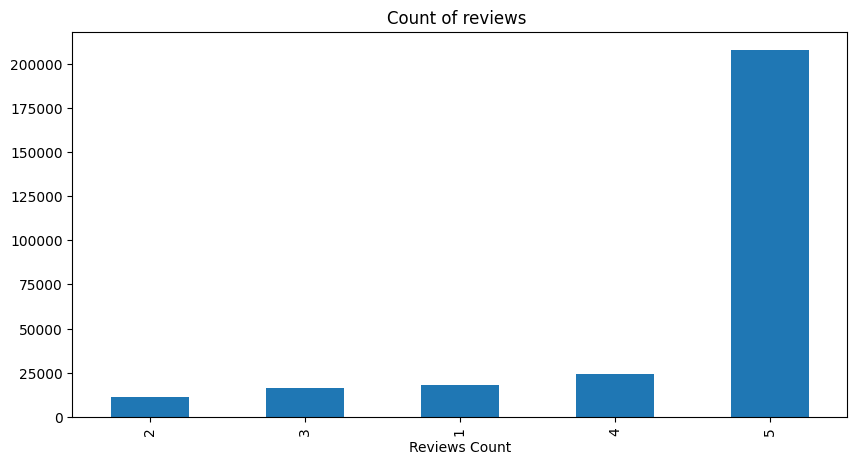

In [ ]:
# plotting the count of the unique values within the review-label
reviews = df['review-label']
ax = reviews.value_counts().sort_values()\
      .plot( title = 'Count of reviews ',
            figsize = (10,5),
             kind = 'bar')
ax.set_xlabel('Reviews stars')

In [ ]:
# checking for null values in columns
df.isnull().sum()

store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

In [ ]:
df['review-label'].value_counts()

5    207574
4     24501
1     18133
3     16555
2     11337
Name: review-label, dtype: int64

In [ ]:
example = df['review'].values[2]
print(example)

These guys offer the best customer service in all of retail! Their products are off high quality and there's a fantastic selection of design and product options.


In [ ]:
tokens=nltk.wordpunct_tokenize(example)
tokens[ :10]

['These',
 'guys',
 'offer',
 'the',
 'best',
 'customer',
 'service',
 'in',
 'all',
 'of']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[ :10]

[('These', 'DT'),
 ('guys', 'NNS'),
 ('offer', 'VBP'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('in', 'IN'),
 ('all', 'DT'),
 ('of', 'IN')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


(S
  These/DT
  guys/NNS
  offer/VBP
  the/DT
  best/JJS
  customer/NN
  service/NN
  in/IN
  all/DT
  of/IN
  retail/JJ
  !/.
  Their/PRP$
  products/NNS
  are/VBP
  off/RB
  high/JJ
  quality/NN
  and/CC
  there/EX
  '/''
  s/VBD
  a/DT
  fantastic/JJ
  selection/NN
  of/IN
  design/NN
  and/CC
  product/NN
  options/NNS
  ./.)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#sentiment analysis by vader
#1.stop words are removed
#2.each word is scored and combined to a total score

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
example

"These guys offer the best customer service in all of retail! Their products are off high quality and there's a fantastic selection of design and product options."

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.8439}

# Data Cleaning



---



---



---



---



## Filling with mode

In this method we as we have the rating value for each null review, <br> we can fill the review with the mode value of the rate category.

In [257]:
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

In [258]:
# finding the modes for each category
rate_cat_modes = df.groupby('review-label')['review'].apply(lambda x: x.mode()[0])
rate_cat_modes

review-label
1    First time customer with TeePublic...placed an...
2    Did not look like what was pictured. The graph...
3    As described, good delivery I would use them a...
4    4 stars: Great ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ dec...
5                                        Great service
Name: review, dtype: object

In [262]:
df[ df['review'].isnull() ].sample(4)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
107934,107934.0,AU,-25.274398,133.775136,2022,3,2016 00:00:00,The shirt had a funny smell to it,NaN,4
8738,8738.0,US,37.090240,-95.712891,2023,5,2007 00:00:00,Awesome guys,NaN,5
131656,131656.0,US,37.090240,-95.712891,2021,11,2026 00:00:00,XL LOOKS MORE LIKE A L,NaN,3
170906,170906.0,US,37.090240,-95.712891,2020,12,2027 00:00:00,Quality was not there.,NaN,2


In [263]:
# define a function that fills each Nan review with the most common value
def fillna_rate(row):
   row['review'] = rate_cat_modes[row['review-label']]
   return row

In [264]:
df_filled_mode = df.apply(fillna_rate, axis=1)

In [265]:
df_filled_mode.isnull().sum()

reviewer_id       1
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             9
review            0
review-label      0
dtype: int64

## Filling values using KNN

In [267]:
# find null values
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

we fill the null values of the other column so we can use it in the analysis. <br>
We will fill them with the mode value since they are small.

*   Title has 9 null values
*   reviewer_id will not be filled as it is not used in the KNN as a feature





In [280]:
# the mode value of the title
df['title'].mode()[0]

'Great customer service'

In [281]:
# the title null value rows
df[ df['title'].isnull() ]

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
12301,12301.0,US,37.090240,-95.712891,2023,4,2016 00:00:00,NaN,- These Simpsons themed t-shirts are the best ...,5
17903,17903.0,CA,56.130366,-106.346771,2023,3,2025 00:00:00,NaN,"-Ease of ordering has changed for the better, ...",4
47972,47972.0,CA,56.130366,-106.346771,2022,11,2008 00:00:00,NaN,"- offering a variety of products, by artisans-...",5
101144,101144.0,US,37.090240,-95.712891,2022,4,2009 00:00:00,NaN,NaN,4
124040,124040.0,US,37.090240,-95.712891,2021,12,2022 00:00:00,NaN,- Need confirmation numbers on a more timely b...,2
126610,126610.0,DE,51.165691,10.451526,2021,12,2017 00:00:00,NaN,+++fast shipping+++nice t-shirts+++very good+++,5
198331,198331.0,CA,56.130366,-106.346771,2020,7,2021 00:00:00,NaN,NaN,4
232304,232304.0,US,37.090240,-95.712891,2019,12,2005 00:00:00,NaN,"+Delivery time was great , printing was good b...",4
265332,265332.0,US,37.090240,-95.712891,2018,12,2019 00:00:00,NaN,NaN,5


In [282]:
# we fill the values of
df['title'].fillna( df['title'].mode()[0] , inplace = True)

In [283]:
# verify that the title column value is not null anymores
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 0
review            30503
review-label          0
dtype: int64